In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

## Read DataFrame and explore Data

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
len(df.columns)

19

## Create trip Duration Column

This will be our predicted feature

In [4]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df.duration.dt.total_seconds() / 60

In [5]:
df.duration.mean()

np.float64(15.668995167330449)

In [6]:
df.duration.std()

42.594351241920904

#### Explore data and remove outliers

In [7]:
len(df[(df.duration >= 1) & (df.duration <= 60)]) / len(df) * 100

98.1220282212598

In [8]:
df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

We can assume that 1.8%~ of values were outliers (less than 1 minute and more than 60 minutes)

#### One-hot encoding

We will use the `PULocationID` and `DOLocationID` as features so we need to encode the data to make it understable by the ML algorithm

In [9]:
categories = ['PULocationID', 'DOLocationID'] 
df[categories] = df[categories].astype(str)

In [10]:
train_dicts = df[categories].to_dict(orient='records')

In [11]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [12]:
print(f'Feature matrix size: {X_train.shape}')

Feature matrix size: (3009173, 515)


In [13]:
target = 'duration'
y_train = df[target].values

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f'Train RMSE: {root_mean_squared_error(y_train, y_pred)}')

Train RMSE: 7.649261932456945


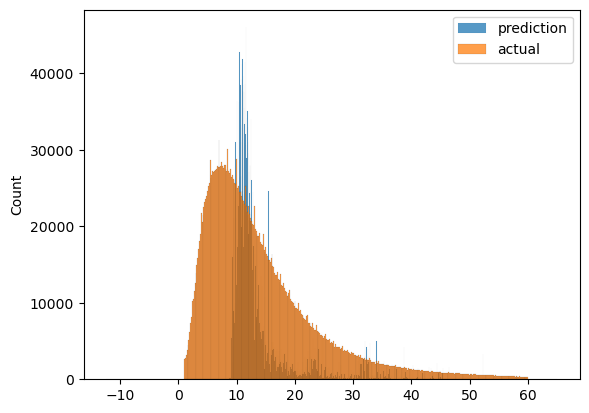

In [15]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend();

## Validate Data

In [16]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [17]:
df_val['duration'] = df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime
df_val['duration'] = df_val.duration.dt.total_seconds() / 60

In [ ]:
len(df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]) / len(df_val) * 100
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)].copy()